In [1]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [2]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assignment_3(Linear%20Regression)/kc_house_data.csv")

In [4]:
'''df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
'''

"df['bathrooms'] = df['bathrooms'].astype(int)\ndf['floors'] = df['floors'].astype(int)\n"

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df.drop(df[df['bedrooms'] == 33].index)


In [ ]:
df = df.drop(df[df['bathrooms'] >= 7].index)


In [5]:
def remove_outliers(df):
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [6]:
# Apply function to df
df = remove_outliers(df)

In [7]:
df['price_per_sqft'] = df.groupby('zipcode')['price'].transform(lambda x: x / df['sqft_living'])


In [9]:
df['month'] = df['date'].dt.month

In [10]:
df['Year'] = df['date'].dt.year

In [11]:
# Calculate the age of the house and create a new variable 'house_age'
df['house_age'] = (df['Year'] - df['yr_built'])

In [8]:
df['grade'].unique()

array([ 7,  6,  8,  9,  5, 10,  4, 11,  3], dtype=int64)

In [21]:
# Create function to classify amounts
def Floor_cat(x):
    if x >= 0 and x < 2:
        return 1
    elif x >= 2 and x < 3:
        return 2
    elif x >= 3 and x < 4:
        return 3
    else:
        return 'Missing'

In [22]:
# Create function to classify amounts
def grade_cat(x):
    if x <= 3:
        return 1
    elif x >= 4 and x <=6:
        return 2
    elif x >= 7 and x < 10:
        return 3
    elif x >= 10:
        return 4
    else:
        return 'Missing'

In [23]:
df['grade_category'] = df['grade'].apply(grade_cat)

In [24]:
df['Floor_category'] = df['floors'].apply(Floor_cat)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19776 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              19776 non-null  int64         
 1   date            19776 non-null  datetime64[ns]
 2   price           19776 non-null  float64       
 3   bedrooms        19776 non-null  int64         
 4   bathrooms       19776 non-null  float64       
 5   sqft_living     19776 non-null  int64         
 6   sqft_lot        19776 non-null  int64         
 7   floors          19776 non-null  float64       
 8   waterfront      19776 non-null  int64         
 9   view            19776 non-null  int64         
 10  condition       19776 non-null  int64         
 11  grade           19776 non-null  int64         
 12  sqft_above      19776 non-null  int64         
 13  sqft_basement   19776 non-null  int64         
 14  yr_built        19776 non-null  int64         
 15  yr_reno

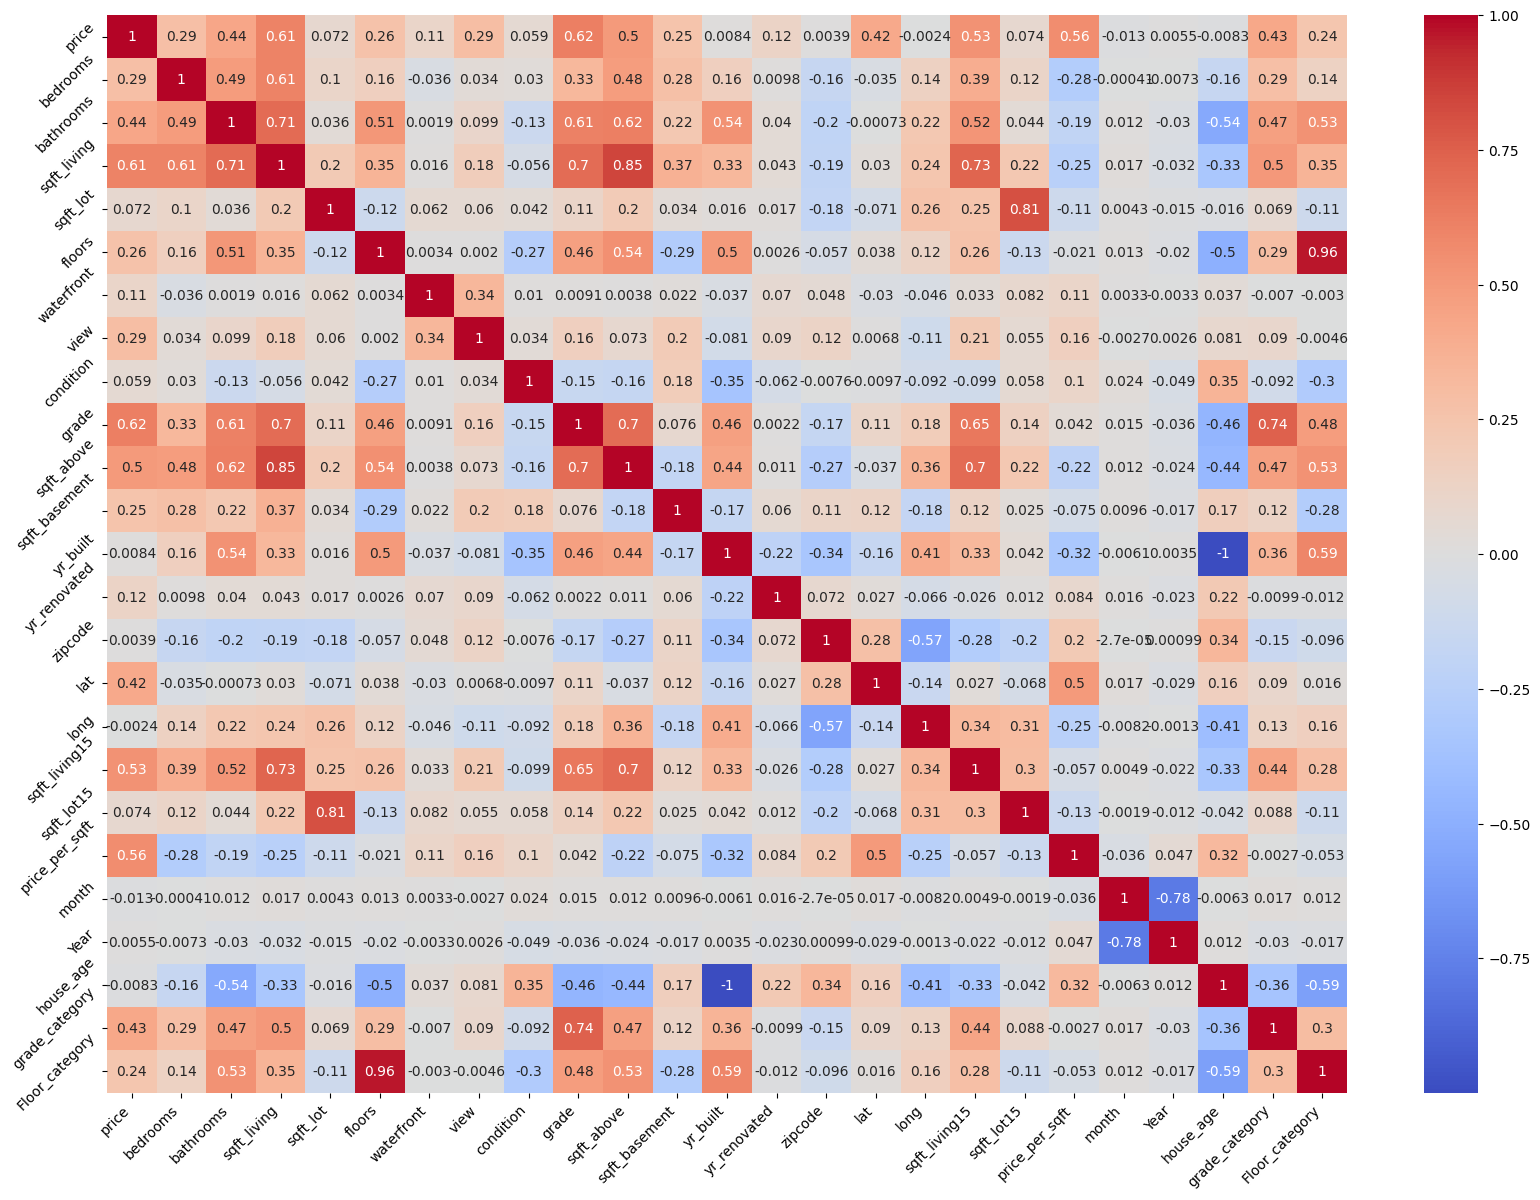

In [69]:
df_corr= df

df_corr.drop(columns=['date','id'], inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 14))  # Adjust the figsize according to your preference

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x_tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y_tick labels

plt.show()

In [70]:
# separate features and target  BEST SO FAR
categorical_features = ['floors','waterfront', 'view','condition', 'grade','grade_category','Floor_category']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','price_per_sqft','month','Year','house_age']
target = 'price' 

In [59]:
'''# separate features and target
categorical_features = ['waterfront', 'view','condition','grade_category','Floor_category']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','price_per_sqft','month','Year','house_age']
target = 'price' '''

In [107]:
# separate features and target  BADDDD
categorical_features = ['floors','grade','waterfront', 'view','condition']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','price_per_sqft','month','Year','house_age']
target = 'price'


In [98]:
'''
# separate features and target  SECOND BEST
categorical_features = ['floors','waterfront', 'view','condition', 'grade','grade_category','Floor_category']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','price_per_sqft','month','Year','house_age']
target = 'price' 
'''

"\n# separate features and target  SECOND BEST\ncategorical_features = ['floors','waterfront', 'view','condition', 'grade','grade_category','Floor_category']\nnumerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','price_per_sqft','month','Year','house_age']\ntarget = 'price' \n"

In [88]:
''' # separate features and target   THIRD BEST 
categorical_features = ['waterfront', 'view','condition','grade_category','Floor_category']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','price_per_sqft','month','Year','house_age']
target = 'price' 
'''

In [108]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [110]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [111]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [112]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [113]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'grade',
                                                   'waterfront', 'view',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_above',
                                                   'sqft_basement',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'price_per_sqft', 'month',
                                                   'Year', 'house_age'])])),
                ('regressor', LinearRegression())])

In [114]:
pred = linear_regression.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
np.sqrt(mean_squared_error(pred,y_test))

68938.74146387225

In [ ]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']